In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [25]:
df= pd.read_csv('/content/heart.csv')
print("Sample of the first 10 rows of the table\n\n")
df.head(10)


Sample of the first 10 rows of the table




,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [26]:
print(f"Number of records in the dataset ready to be processed: {df.shape[0]}")
print(f"Number of details per record in the dataset ready to describe: {df.shape[1]}")

Number of records in the dataset ready to be processed: 918
Number of details per record in the dataset ready to describe: 12


In [27]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 331.6 KB




1. As the presented dataframe contains columns that are non-null values, we can skip the step where we need to take care of the missing values
2. Further, we will change a bit the datatypes of the dataframe, splitting them into 2 (categorical variables and numerical)

In [28]:
df = df.astype({'HeartDisease': 'category',
           'FastingBS': 'category'})
df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [29]:
number_dataTypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericals = df.select_dtypes(include=number_dataTypes).columns
print("Columns that hold numerical data are: ")
for item in numericals:
  print(item)

Columns that hold numerical data are: 
Age
RestingBP
Cholesterol
MaxHR
Oldpeak


In [30]:
category_dataTypes = ['object', 'category']
categoricals = df.select_dtypes(include=category_dataTypes).columns
print("Columns that hold categorical data are: ")
for item in categoricals:
  print(item)

Columns that hold categorical data are: 
Sex
ChestPainType
FastingBS
RestingECG
ExerciseAngina
ST_Slope
HeartDisease


In [31]:
print("Describing statistical variables for the numeric columns:")
df.describe().T.style.background_gradient(cmap = "Reds")

Describing statistical variables for the numeric columns:


,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [32]:
print("Describing statistical variables for the categorical columns:")
df.describe(include = category_dataTypes).T

Describing statistical variables for the categorical columns:


,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,Yes,508


In [33]:
def pie_charts(feature, target):
    colors = sns.color_palette('colorblind')[0:5]
    fig,axes = plt.subplots(1,1,figsize=(8,6))
    labels = df[feature].unique()
    textprops = {"fontsize":17}

    axes.pie(df[df[target]=="Yes"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.2f%%',textprops =textprops)
    axes.set_title(f'Percent of people that suffered a {target} based on {feature}',fontsize=13)

    plt.show()

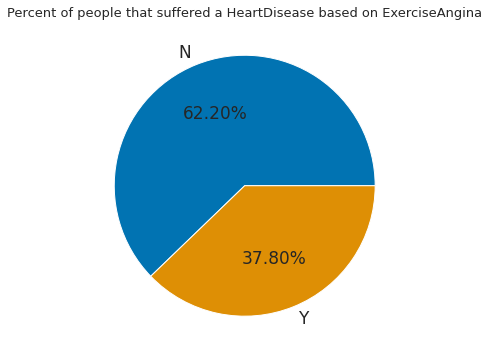

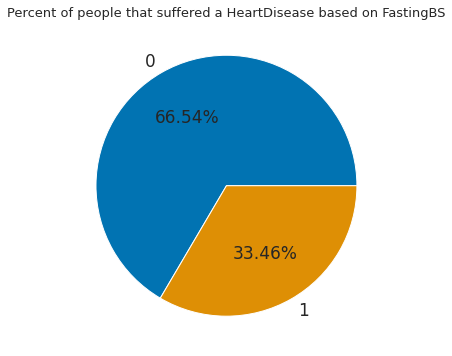

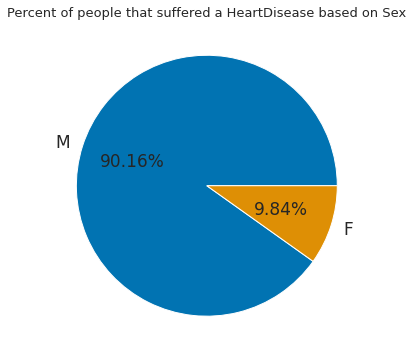

In [34]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(feature,"HeartDisease")

In [35]:
def bar_charts(data, feature, target) :
    sns.set(rc={'figure.figsize':(12,9)})
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=["aqua","red"])
    grouped_columns.set_title(f'Impact on different {feature} groups on having a {target}')

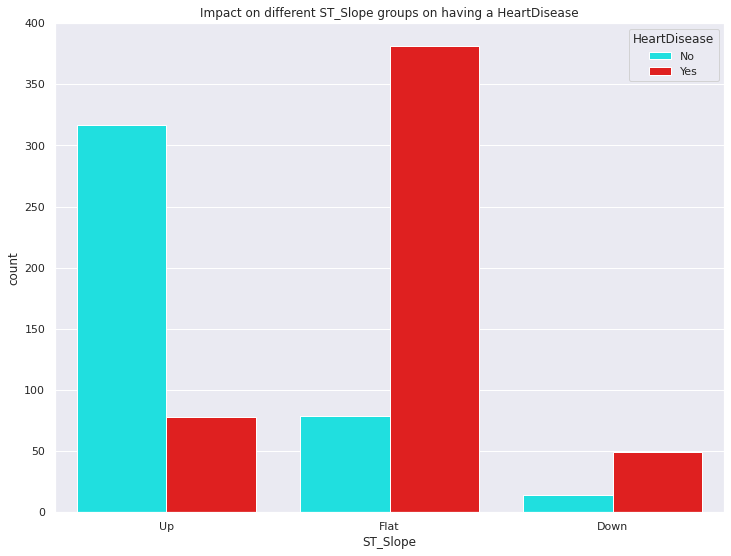

In [36]:
bar_charts(df, "ST_Slope", "HeartDisease")

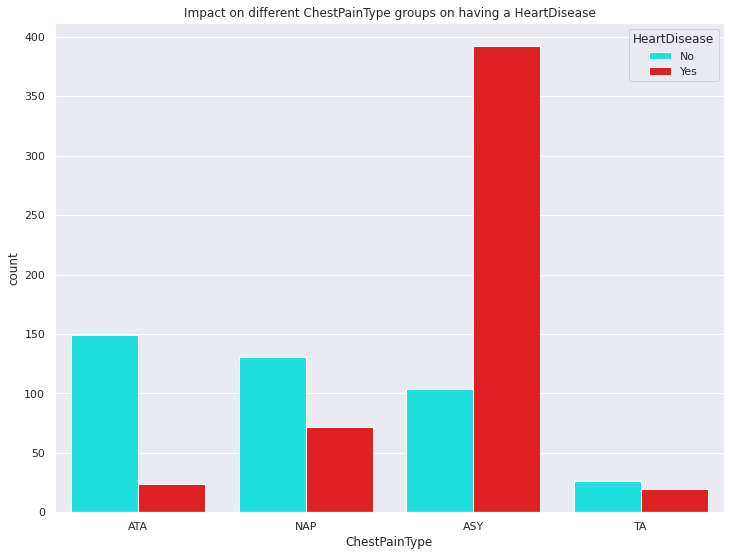

In [37]:
bar_charts(df, "ChestPainType", "HeartDisease")

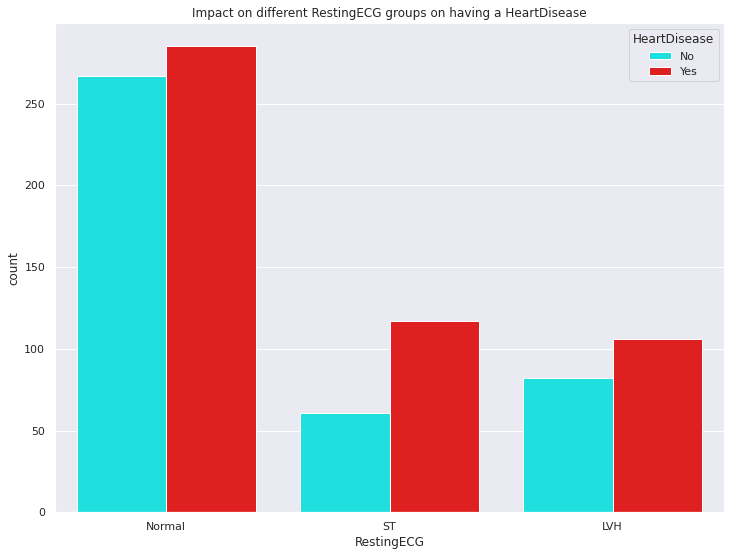

In [38]:
bar_charts(df, "RestingECG", "HeartDisease")

In [39]:
def density_charts(column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df[target]=='Yes'][column],shade = False, color="red", label=target, ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

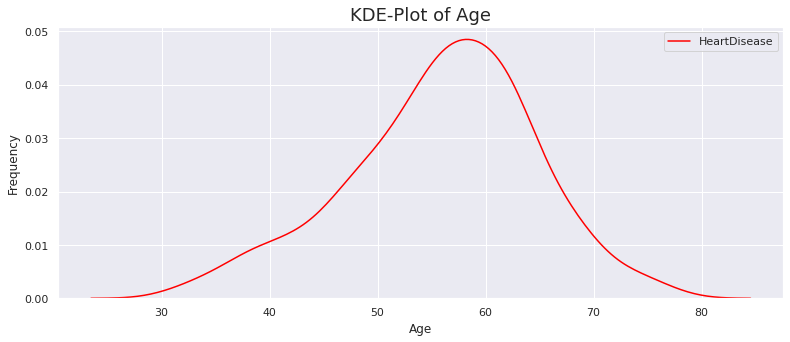

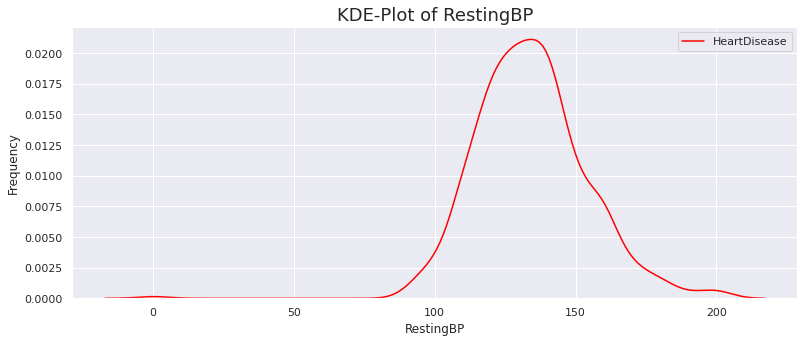

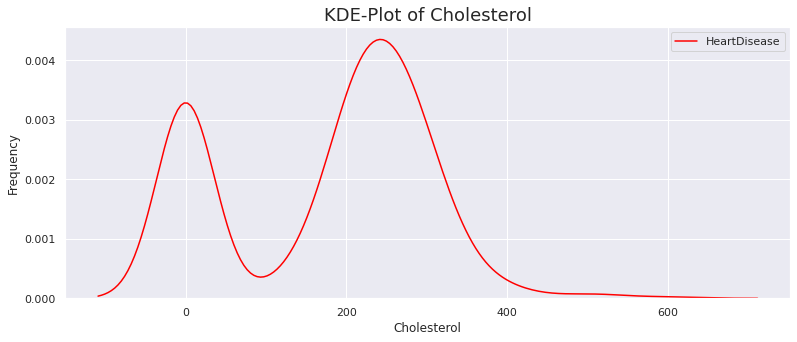

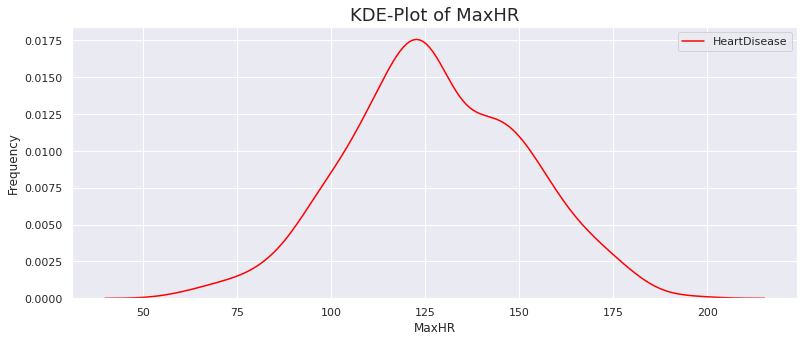

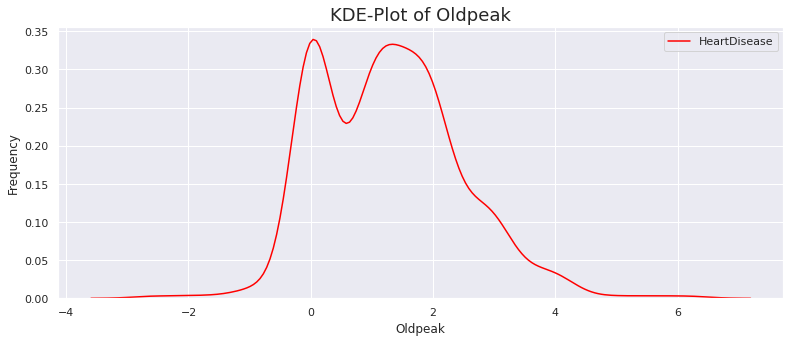

In [40]:
for column in numericals : 
    density_charts(column, 'HeartDisease')

In [41]:
def histograms(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, color="red",multiple="stack")

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color="red")

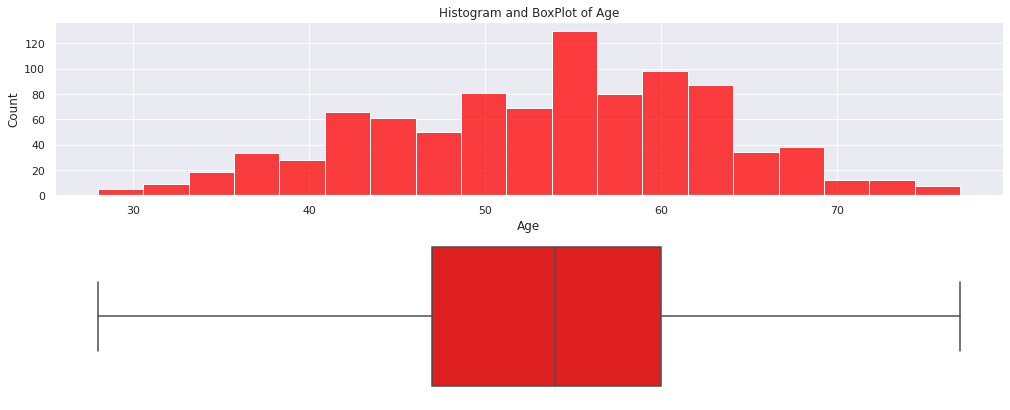

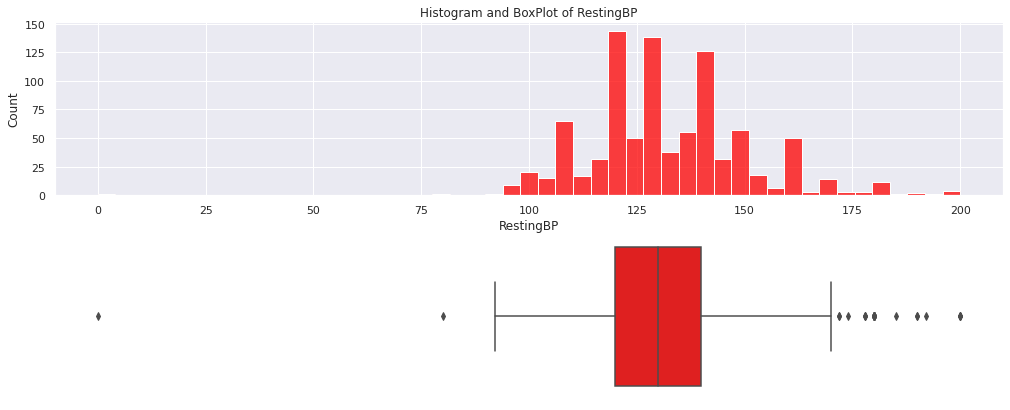

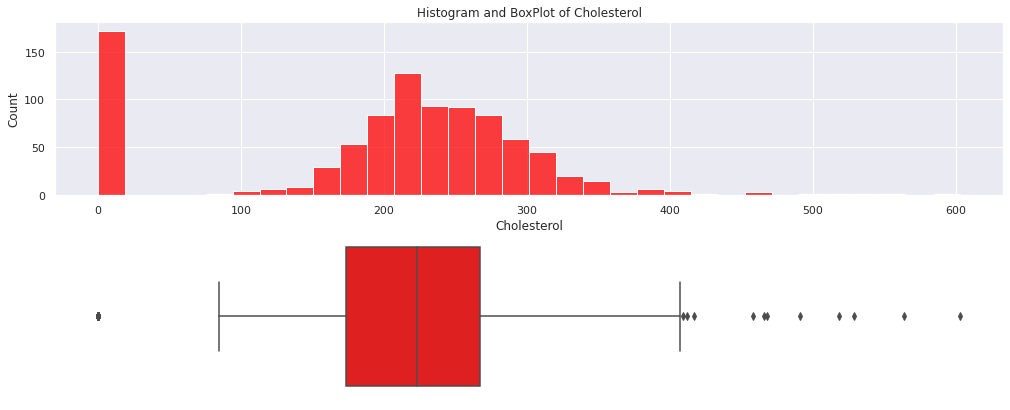

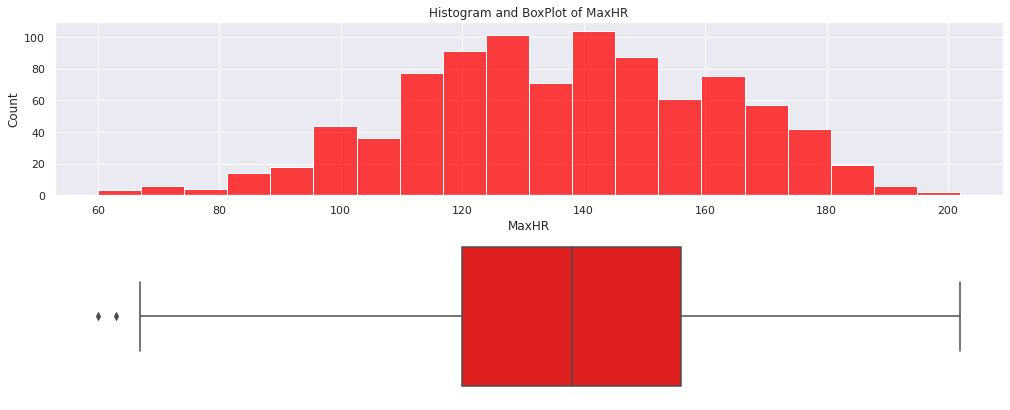

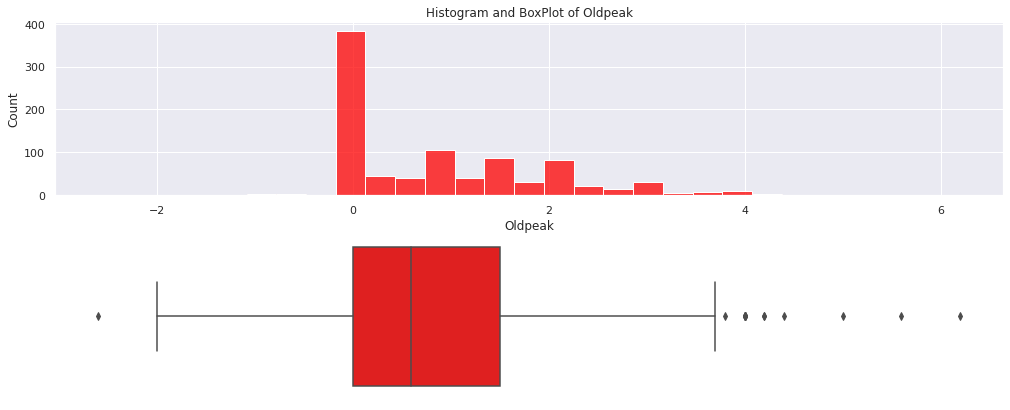

In [42]:
for col in numericals:
    histograms(df[col], col)

In [43]:
def show_grouped_data(features,target):
  plt.figure(figsize=(20,20))
  index=1
  for feature in features:
      plt.subplot(3,4,index)
      sns.countplot(x=df[feature],hue=df[target])
      plt.title(f'{feature}') 

      plt.subplot(3,4,index+1)
      feature_counts = df[feature].value_counts()
      plt.pie(feature_counts,explode=[0.1 for _ in range(feature_counts.shape[0])],autopct='%0.2f%%',shadow=True,labels=feature_counts.index)
      plt.title(f'{feature}')

      index +=2

  plt.show()

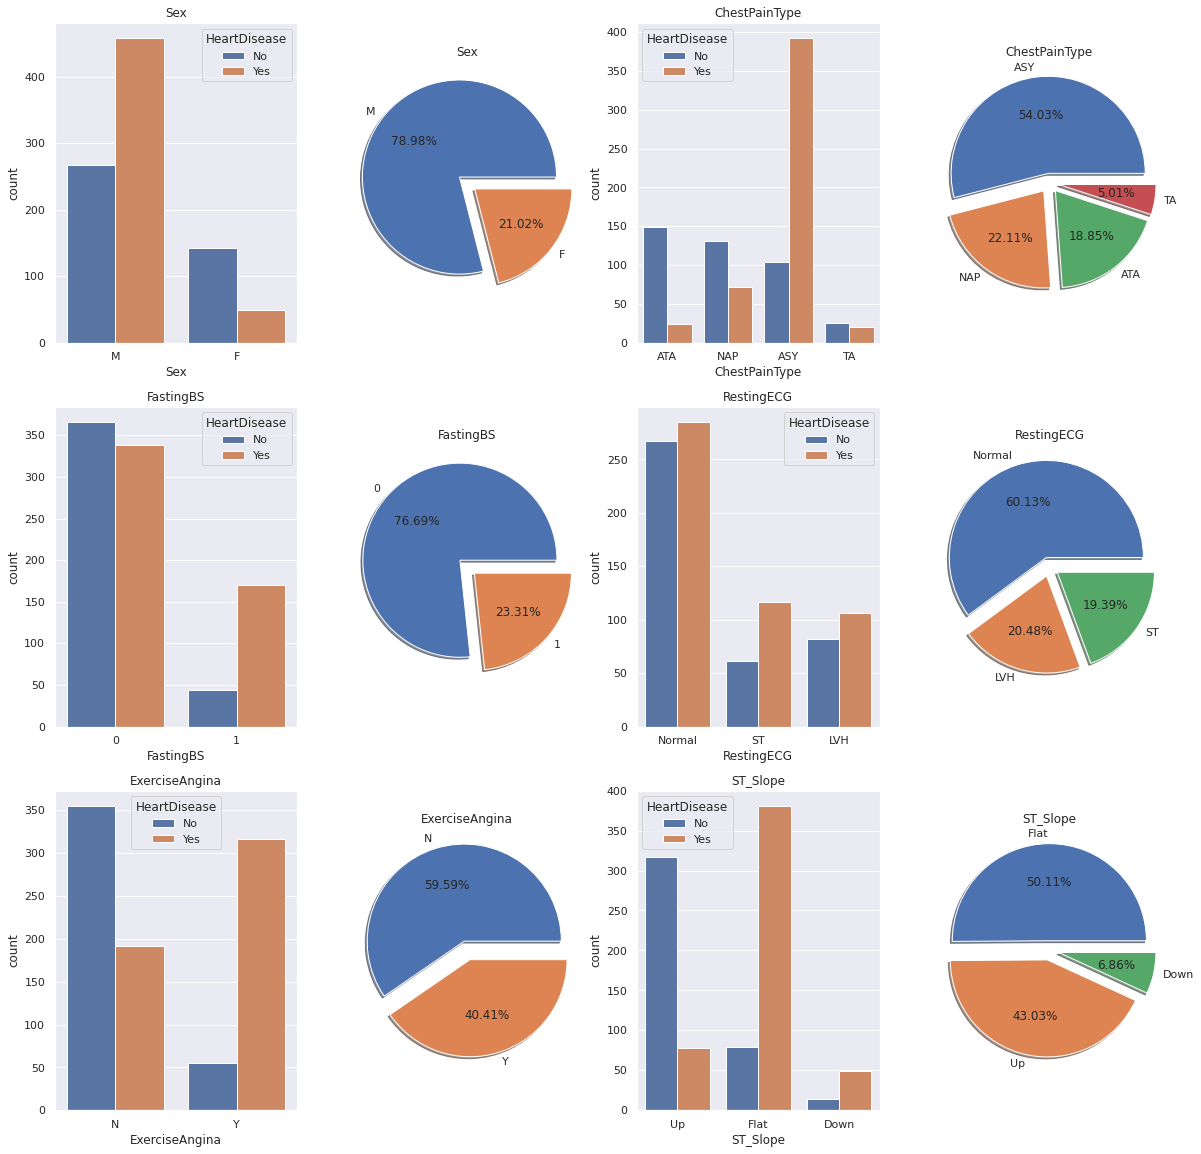

In [44]:

show_grouped_data(categoricals.drop('HeartDisease'),'HeartDisease')

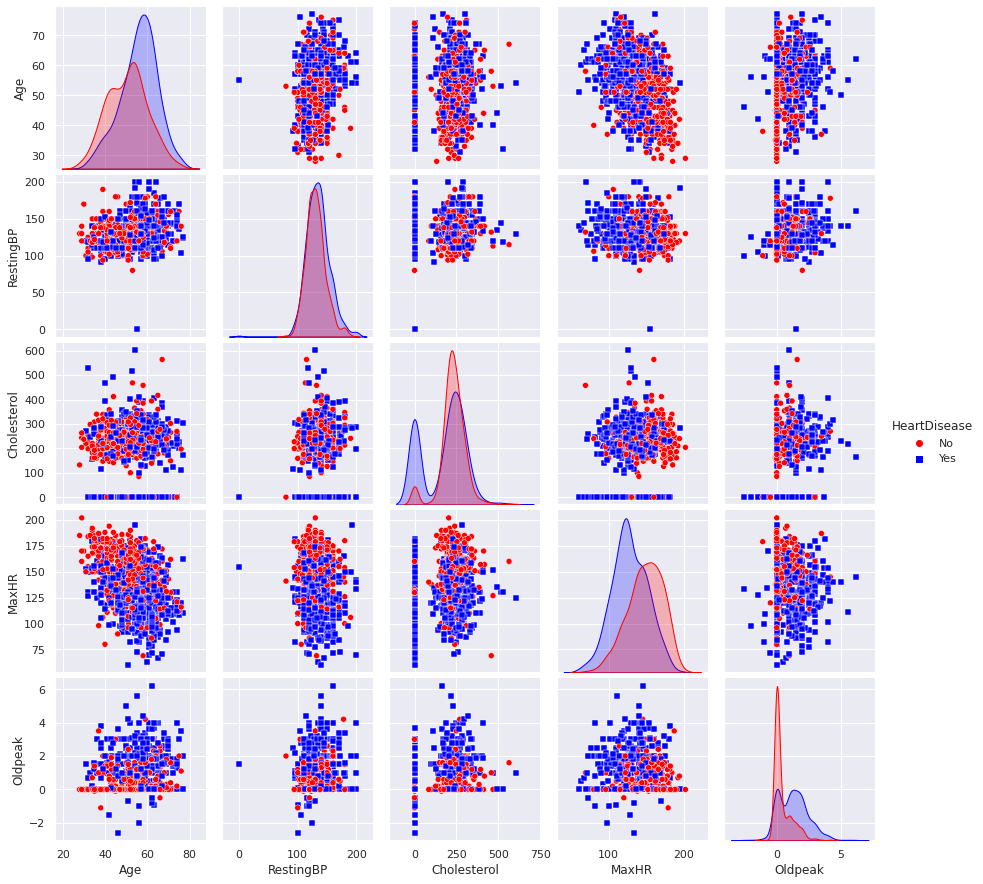

In [45]:
plot = sns.pairplot(df,hue='HeartDisease', markers=["o", "s"], palette=['red','blue'])
plt.show()

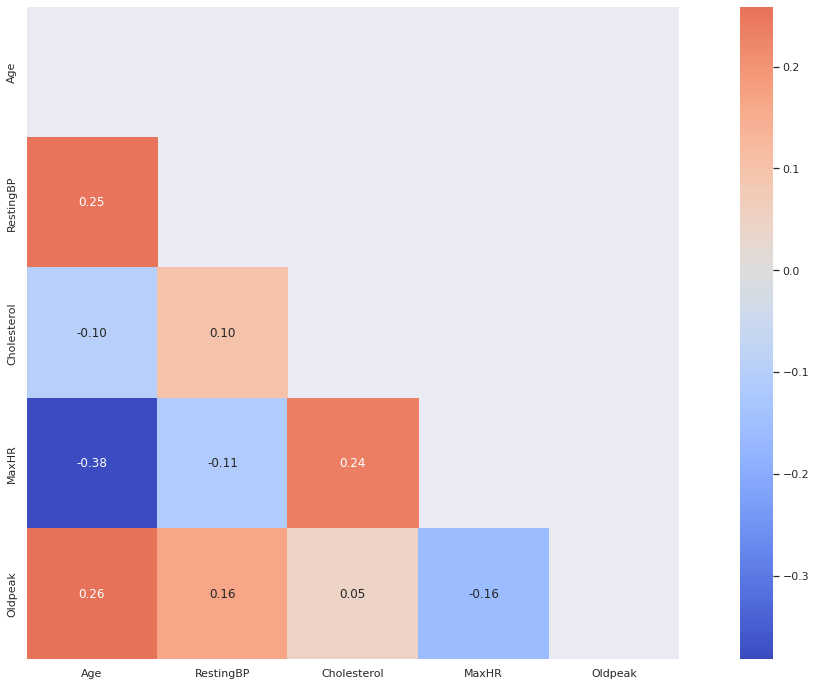

In [46]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()